In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functions.inequality import gini
from matplotlib import style
import random

In [2]:
style.use('seaborn-ticks')

# Repeat the simple experiment from McBride 2014

https://taxfoundation.org/market-volatility-alone-can-cause-inequality/

If you take 100 individuals and give them each a random rate of return every year for 100 years, it turns out that market volatility alone generates a tremendous amount of wealth inequality.

create 100 individuals with equal wealth 

generate random return for each of them for 100 periods

change stdev return 

In [56]:
periods = 100
stdev_low = 0.01
stdev_high = 0.10

In [57]:
# create 100 individuals equal wealth
pop_size = 3
random_range = list(random.randint(9, 11) for x in range(pop_size))

population_low = [[random_range[x]] for x in range(pop_size)]
population_high = [[random_range[x]] for x in range(pop_size)]
poplulation_high_reset = [[random_range[x]] for x in range(pop_size)]

For 100 periods generate a random return for every agent with an average of 0 and a standard devation of $\sigma$

In [58]:
# evolve low standard deviation population
for i in range(pop_size):
    returns = np.random.normal(loc=0.0, scale=stdev_low, size=periods)
    for x in range(1, len(returns)):
        population_low[i].append(population_low[i][-1] * (1 + returns[x]))

In [59]:
# evolve high standard deviation population
for i in range(pop_size):
    returns = np.random.normal(loc=0.0, scale=stdev_high, size=periods)
    for x in range(1, len(returns)):
        population_high[i].append(population_high[i][-1] * (1 + returns[x]))

In [60]:
# evolve high standard deviation population
for i in range(pop_size):
    returns = np.random.normal(loc=0.0, scale=stdev_high, size=periods)
    for x in range(1, len(returns)):
        poplulation_high_reset[i].append(poplulation_high_reset[i][0] * (1 + returns[x]))

Calculate the palma ratio of the population for a certain time period

In [61]:
#t = 99
wealth_distr_low_vol = [population_low[agent][periods-1] for agent in range(pop_size)]
wealth_distr_high_vol = [population_high[agent][periods-1] for agent in range(pop_size)]
wealth_distr_high_vol_reset = [poplulation_high_reset[agent][periods-1] for agent in range(pop_size)]

In [62]:
def calc_palma(wealth_distr):
    share_top_10 = sum(np.sort(wealth_distr)[int(len(wealth_distr) * 0.9):]) / sum(wealth_distr)
    share_bottom_40 = sum(np.sort(wealth_distr)[:int(len(wealth_distr) * 0.4)]) / sum(wealth_distr)
    return share_top_10 / share_bottom_40

In [63]:
palma_low = calc_palma(wealth_distr_low_vol)
palma_high = calc_palma(wealth_distr_high_vol)
palma_high_reset = calc_palma(wealth_distr_high_vol_reset)
print('palma low volatility: ', palma_low)
print('palma high volatility: ', palma_high)
print('palma high volatility: ', palma_high_reset)

palma low volatility:  1.0938976925760804
palma high volatility:  3.4414953062405997
palma high volatility:  1.1310063527122376


In [64]:
gini_low = gini(np.array(wealth_distr_low_vol))
gini_high = gini(np.array(wealth_distr_high_vol))
gini_high_reset = gini(np.array(wealth_distr_high_vol_reset))
print('gini low volatility: ', gini_low)
print('gini high volatility: ', gini_high)
print('gini high volatility_reset: ', gini_high_reset)

gini low volatility:  0.02001757158411733
gini high volatility:  0.2952514739309563
gini high volatility_reset:  0.02699814481969588


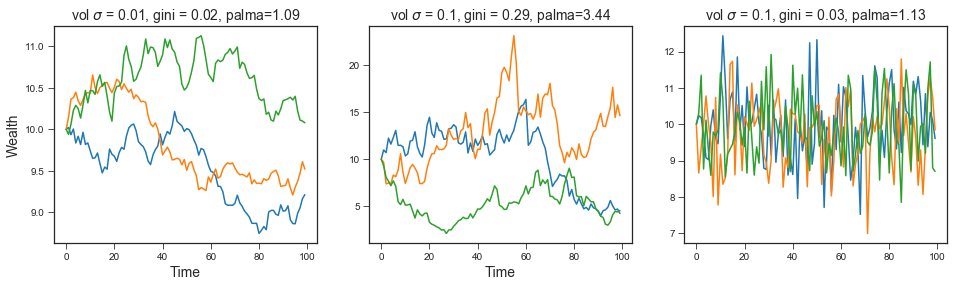

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

for a in population_low:
    ax1.plot(range(len(a)), a)
    
ax1.set_title('vol $\sigma$ = {}, gini = {}, palma={}'.format(stdev_low, 0.02, 1.09), fontsize='14')
ax1.set_ylabel('Wealth', fontsize='14')
    
for b in population_high:
    ax2.plot(range(len(b)), b)
    
ax2.set_title('vol $\sigma$ = {}, gini = {}, palma={}'.format(stdev_high, 0.29, 3.44), fontsize='14')

for b in poplulation_high_reset:
    ax3.plot(range(len(b)), b)

ax3.set_title('vol $\sigma$ = {}, gini = {}, palma={}'.format(stdev_high, 0.03, 1.13), fontsize='14')
    
for ax in [ax1, ax2]:
    ax.set_xlabel('Time', fontsize='14')

    

fig.savefig('simple_experiment.png')